# Airline tweet sentiment analysis

* Initially ran the random forest classifier with the columns of negativereason_gold,  airline_sentiment_gold, tweet_coord removed because they all had + 90% of the data missing but acheived lower than 67% accuracy for the model. Ran the model again with the columns included and acheived +75%

In [1]:
import re
import nltk
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas_profiling
from nltk.corpus import stopwords

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from mlxtend.plotting import plot_confusion_matrix

In [3]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, classification_report

In [4]:
data_source_url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
df = pd.read_csv(data_source_url)

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [7]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

# Missing Values

* There is more than 90 percent of the data missing from the 3 columns - negativereason_gold, airline_sentiment_gold, tweet_coord


* Removing those columns from the dataset

In [8]:
def miss_val_percentage(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    
    percentage = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)
    
    return pd.concat([total, percentage], axis = 1, keys = ['Total Values Missing', 'Percentage'])

In [9]:
miss_val_percentage(df)

,Total Values Missing,Percentage
negativereason_gold,14608,99.78
airline_sentiment_gold,14600,99.73
tweet_coord,13621,93.04
negativereason,5462,37.31
user_timezone,4820,32.92
tweet_location,4733,32.33
negativereason_confidence,4118,28.13
tweet_created,0,0.00
text,0,0.00
retweet_count,0,0.00


In [10]:
#df.shape

In [11]:
#del df['negativereason_gold']
#del df['airline_sentiment_gold']
#del df['tweet_coord']

In [12]:
#df.shape

## Creating a dataframe for tweets, sentiment, & airline

In [13]:
tweet_sentiment_df = df[["airline_sentiment","text","airline","retweet_count"]]

In [14]:
tweet_sentiment_df.head(4)

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0


## Tweet sentiment visualization

* Significantly more negative tweets than neutral or positive. Why is that?

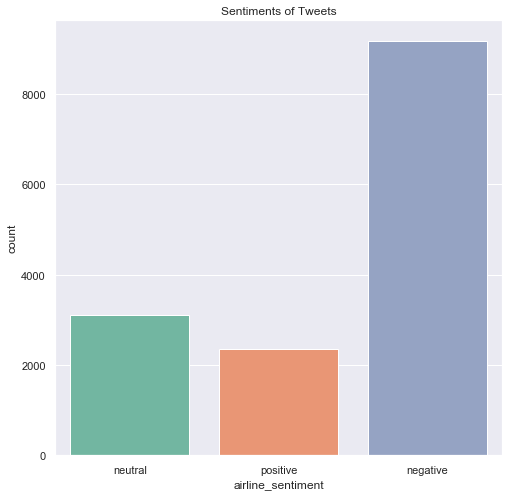

In [15]:
sns.set()
plt.figure(figsize=(8,8))
sns.countplot(x=tweet_sentiment_df["airline_sentiment"],palette="Set2")
plt.title("Sentiments of Tweets")
plt.show()

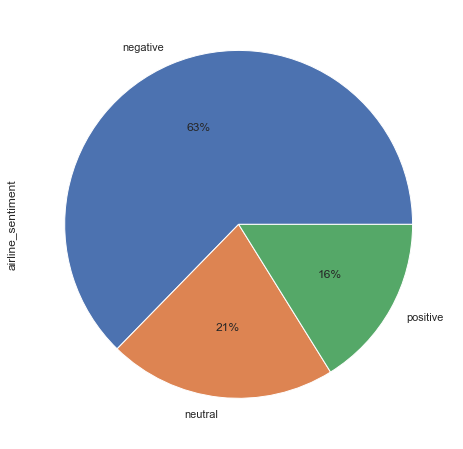

In [16]:
plt.figure(figsize=(8,8))
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

## Tweets

* Visualization of tweets of each individual airline


* All airlines have more negative tweets than positive or neutral. Why is that? Is it that service and experience is just that bad on 'every' airline? Are people more likely to tweet if their experience is negative as opposed to a positive or neutral experience?



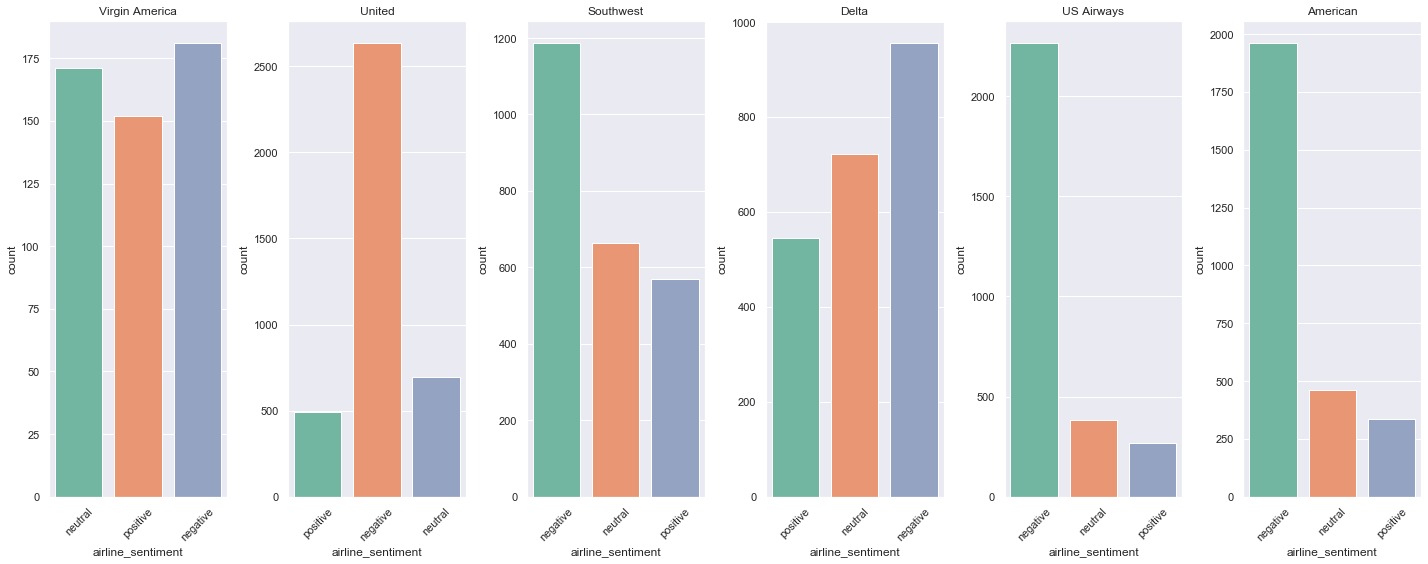

In [17]:
tweeet_plot = 1
plt.subplots(figsize=(20,8),tight_layout=True)
for i in tweet_sentiment_df["airline"].unique():
        x = tweet_sentiment_df[tweet_sentiment_df["airline"]==i]
        plt.subplot(1, 6, tweeet_plot)
        sns.countplot(x["airline_sentiment"],palette="Set2")
        plt.xticks(rotation=45)
        plt.title(i)
        tweeet_plot += 1
plt.show()

# Negative Reasons

* Plotting of negative reasons for individual airlines and in entirety


* With the exception of Delta airlines, customer service issue has the highest count for reasons for negative tweets.

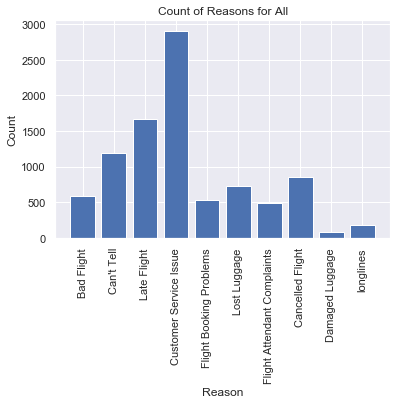

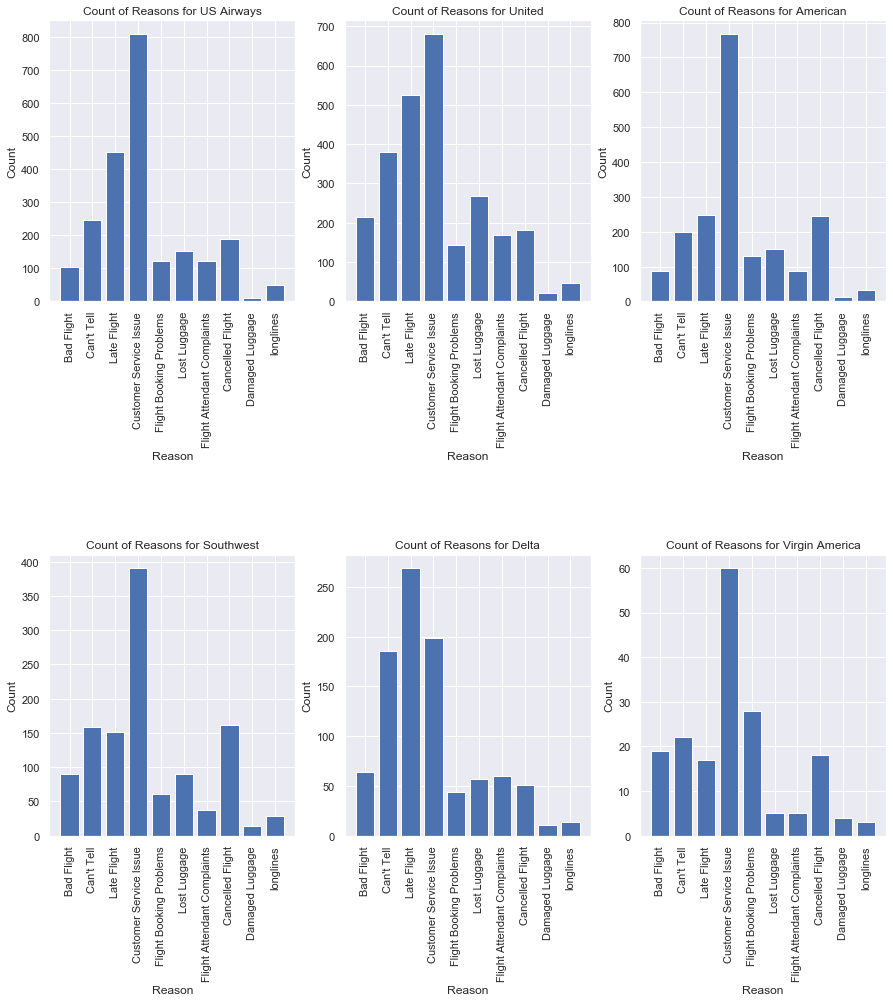

In [18]:
df['negativereason'].nunique()

airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

Negative_Reason_Count=dict(df['negativereason'].value_counts(sort=False))
def Negative_Reason_Count(Airline):
    if Airline=='All':
        a = df
    else:
        a = df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame


def plot_reason(Airline):
    
    a=Negative_Reason_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count)
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(15, 15))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [19]:
negative_reason_count = df['negativereason'].value_counts()

In [20]:
negative_reason_count

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [21]:
negative_reasons = ["Customer Service Issue","Late Flight","Can't Tell", "Cancelled Flight", "Lost Luggage", 
"Bad Flight", "Flight Booking Problems", "Flight Attendant Complaints", "longlines", "Damaged Luggage"]

In [22]:
def plotting_negative_reason_count(reason,reason_count):
    
    index=list(range(10))
    plt.figure(figsize=(12,6))
    
    plt.bar(index,reason_count)
    plt.xticks(index,reason,rotation=90)
    
    plt.xlabel('Negative Reasons')
    plt.ylabel('Reason Counts')
    plt.title('Count of Negative Reasons')

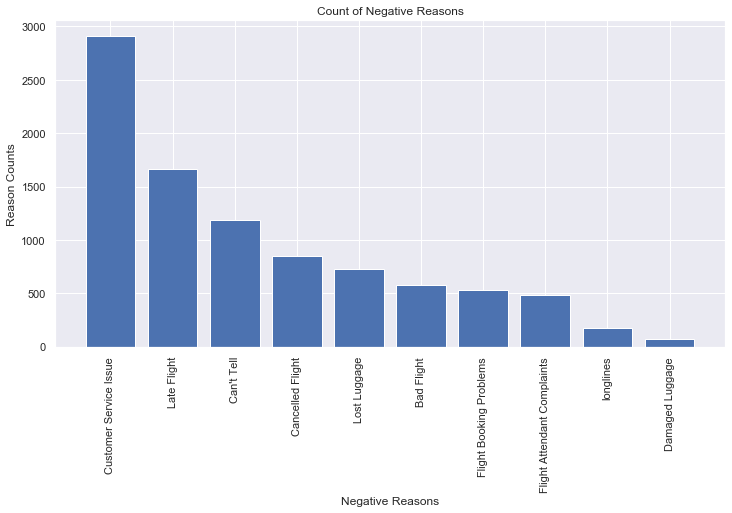

In [23]:
plotting_negative_reason_count(negative_reasons, negative_reason_count)

In [24]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


# Text Processing

* Feature engineering


* Splitting the text and the labels


* Using regular expression for text processing, character substitution, conversion, character removal


* Vectorization using TF-IDF

In [25]:
# Spliting the text and labels

features = df.iloc[:, 10].values # Our text lies in column 10 (11th column)

labels = df.iloc[:, 1].values  # Our labels lie in column 1 (2nd column)

In [26]:
processed_features = []

for sentence in range(0, len(features)):
    
    processed_feature = re.sub(r'\W', ' ', str(features[sentence])) # Remove all the special characters

    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature) # Remove all single characters
  
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) # Remove single characters from the start

    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I) # Substituting multiple spaces with single space

    processed_feature = re.sub(r'^b\s+', '', processed_feature) # Removing prefixed 'b'

    processed_feature = processed_feature.lower() # Converting to Lowercase

    processed_features.append(processed_feature)

In [27]:
nltk.download('stopwords')
 
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model Implementations

* Splitting the data into train & test sets


* 80/20 split


* Random Forest Classifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [29]:
Random_Forest_text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
Random_Forest_text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Let's obtain our predictions on our test dataset
Forest_predictions = Random_Forest_text_classifier.predict(X_test)

In [31]:
print(confusion_matrix(y_test, Forest_predictions))

print(classification_report(y_test, Forest_predictions))

print("Accuracy {0:.2f}%".format(100 * accuracy_score(y_test, Forest_predictions)))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy 75.99%


In [32]:
# Obtain a test sample text from our test dataset

rand_index = np.random.randint(0, len(processed_features))
test_sample_1 = processed_features[rand_index]
print(test_sample_1)

 americanair thanks for your apology but it a bit late flight cancelled flighting flight more than 24 hrs in advance due to weather is ridiculous we


In [33]:
rand_index = np.random.randint(5, len(processed_features))
test_sample_2 = processed_features[rand_index]
print(test_sample_2)

 usairways great operation you guys are running more mechanical issues and now taping piece of plane together lol http co i5v9wfbtue


In [34]:
rand_index = np.random.randint(7, len(processed_features))
test_sample_3 = processed_features[rand_index]
print(test_sample_3)

 southwestair dultch97 kid just wants fucking money scumbag


## Classification of text

In [35]:
vector = vectorizer.transform([test_sample_1])
output = Random_Forest_text_classifier.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - negative


In [36]:
vector = vectorizer.transform([test_sample_2])
output = Random_Forest_text_classifier.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - positive


In [37]:
vector = vectorizer.transform([test_sample_3])
output = Random_Forest_text_classifier.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - negative
